In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/Users/nima/Downloads/data.csv')

In [3]:
data[['battery_capacity','Price']]

,battery_capacity,Price
0,3000.0,100.0
1,3000.0,110.0
2,2000.0,60.0
3,4000.0,330.0
4,4000.0,130.0
...,...,...
2646,1500.0,140.0
2647,1500.0,140.0
2648,1500.0,100.0
2649,1500.0,120.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2651 non-null   int64  
 1   name              2651 non-null   object 
 2   brand             2651 non-null   object 
 3   2G                2651 non-null   bool   
 4   3G                2651 non-null   bool   
 5   4G                2651 non-null   bool   
 6   5G                2651 non-null   bool   
 7   Announced         2651 non-null   float64
 8   Status            2651 non-null   object 
 9   Weight            2651 non-null   float64
 10  Length            2651 non-null   object 
 11  Width             2651 non-null   object 
 12  Diameter          2651 non-null   object 
 13  SIM               2651 non-null   object 
 14  Display Type      2651 non-null   object 
 15  Display Size      2651 non-null   float64
 16  ppi               2651 non-null   float64


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_norm = scaler.fit_transform(data[['battery_capacity','Price']])
x = pd.DataFrame(x_norm,columns=['battery_capacity','Price'])

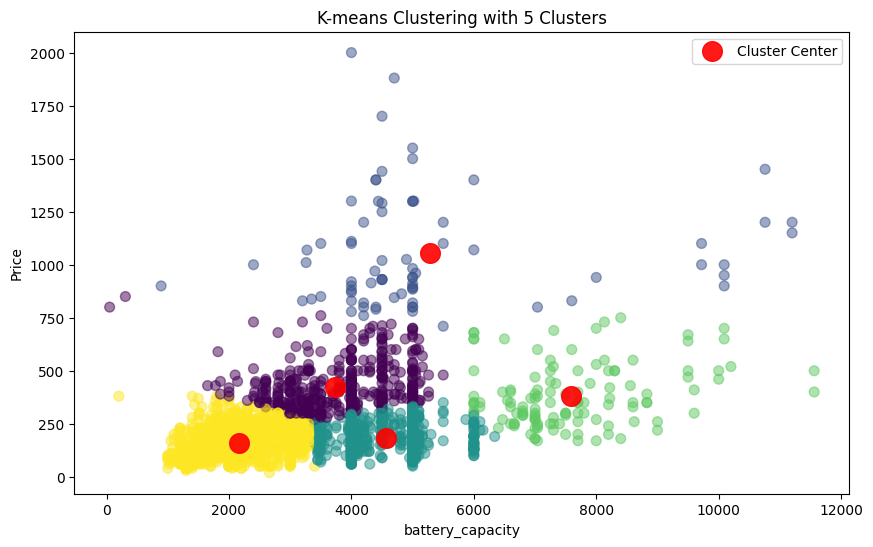

In [6]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(x)
labels = kmeans.labels_

centers_norm = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_norm)

plt.figure(figsize=(10, 6))
plt.scatter(data['battery_capacity'], data['Price'], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centers_original[:, 0], centers_original[:, 1], c='red', s=200, alpha=0.9, label='Cluster Center')
plt.xlabel('battery_capacity')
plt.ylabel('Price')
plt.title('K-means Clustering with 5 Clusters')
plt.legend()

plt.show()

### Elbow Method

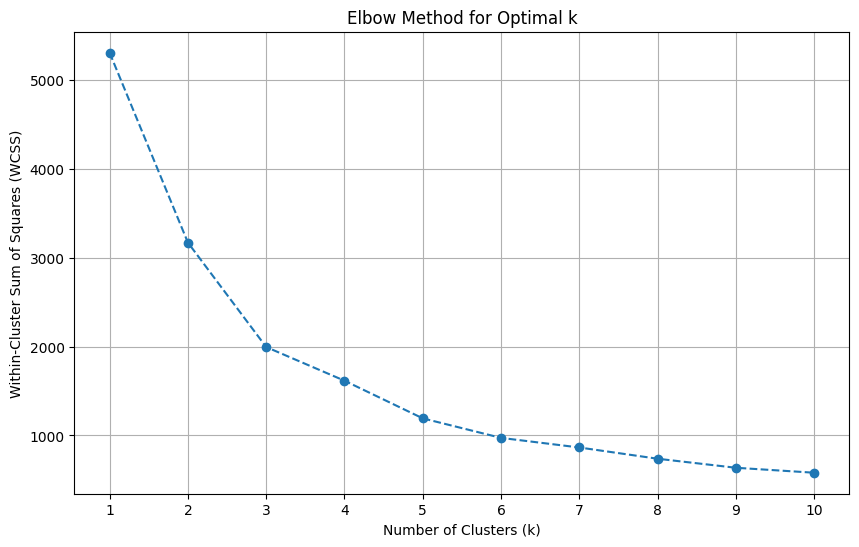

In [7]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Silhouette Score
It quantifies how similar an object is to its own cluster compared to other clusters (the higher, the better)
. The score ranges from -1 to 1
The overall silhouette score is the mean of the silhouette score of all samples.


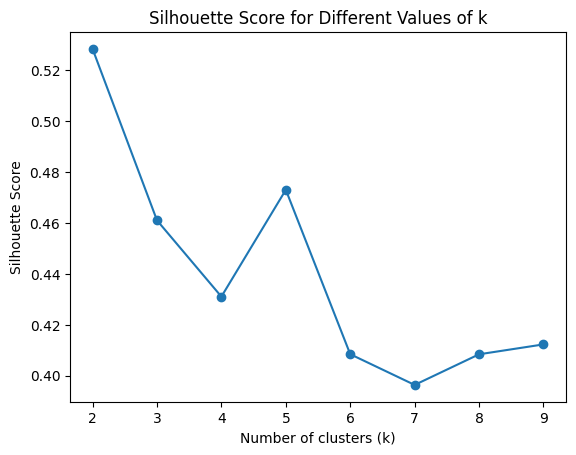

In [8]:
from sklearn.metrics import silhouette_score

k_values = range(2, 10)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.xticks(k_values)
plt.show()


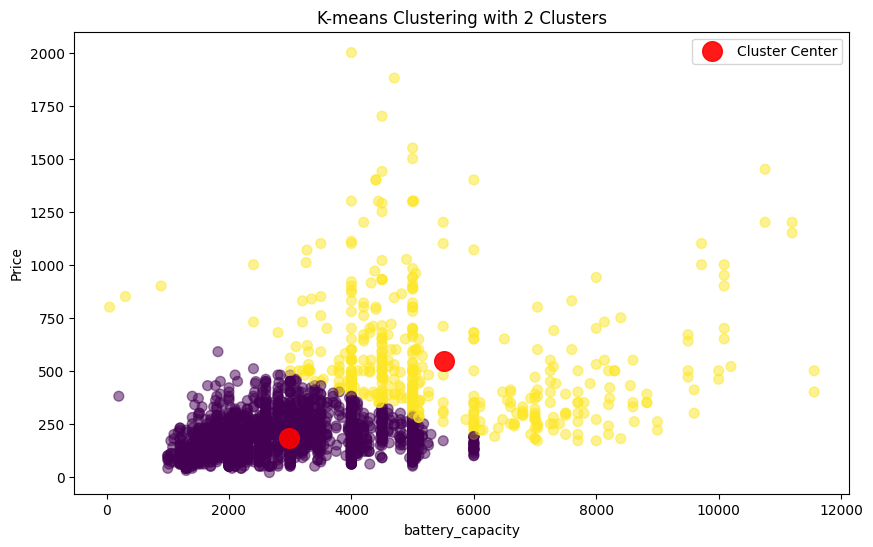

In [9]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(x)
labels = kmeans.labels_

centers_norm = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_norm)

plt.figure(figsize=(10, 6))
plt.scatter(data['battery_capacity'], data['Price'], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centers_original[:, 0], centers_original[:, 1], c='red', s=200, alpha=0.9, label='Cluster Center')
plt.xlabel('battery_capacity')
plt.ylabel('Price')
plt.title('K-means Clustering with 2 Clusters')
plt.legend()

plt.show()

eps=0.1, min_samples=3, clusters=47


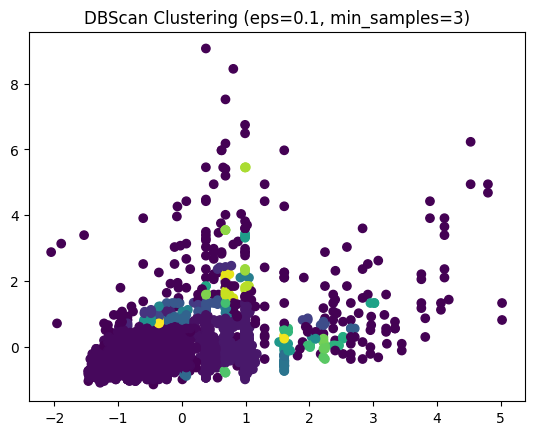

eps=0.1, min_samples=5, clusters=26


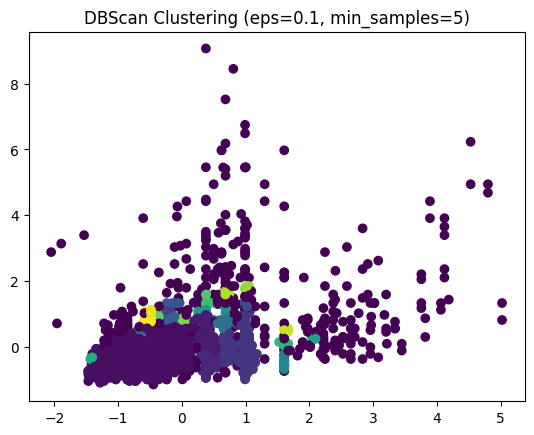

eps=0.1, min_samples=7, clusters=12


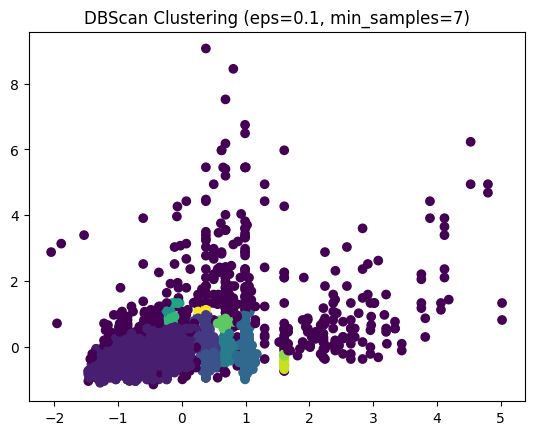

eps=0.2, min_samples=3, clusters=21


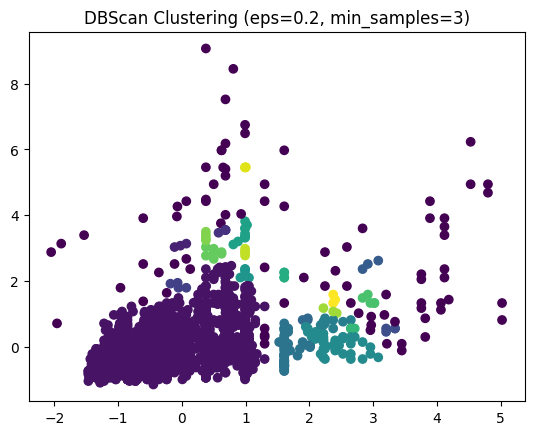

eps=0.2, min_samples=5, clusters=7


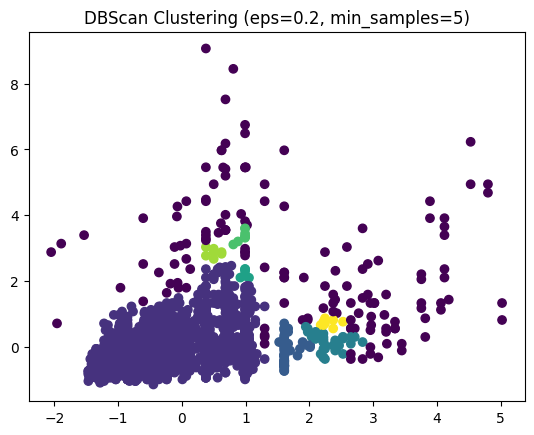

eps=0.2, min_samples=7, clusters=5


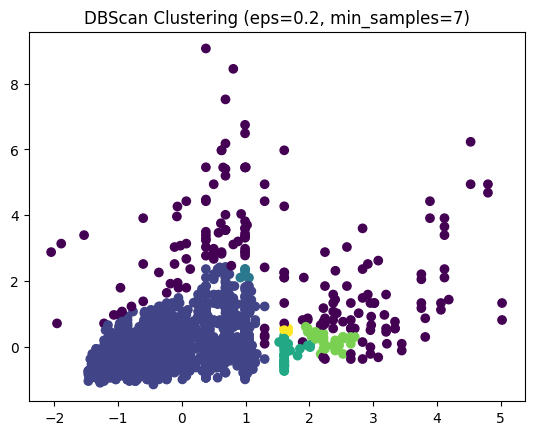

eps=0.3, min_samples=3, clusters=10


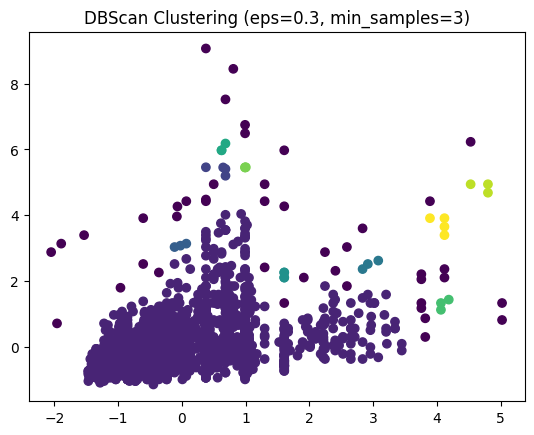

eps=0.3, min_samples=5, clusters=2


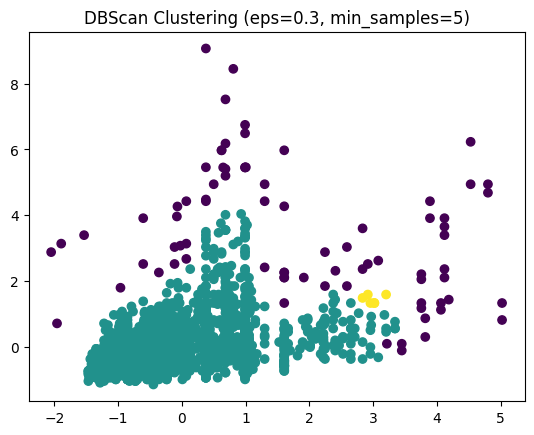

eps=0.3, min_samples=7, clusters=4


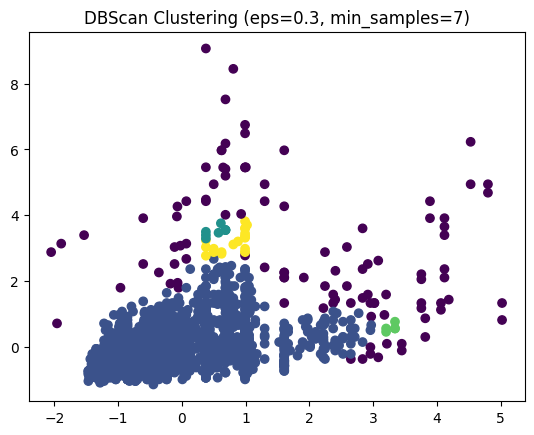

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

for eps in [0.1, 0.2, 0.3]:
    for min_samples in [3, 5, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(x)
        n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
        print(f'eps={eps}, min_samples={min_samples}, clusters={n_clusters_}')

        plt.figure()
        plt.scatter(x['battery_capacity'], x['Price'], c=y_dbscan, cmap='viridis')
        plt.title(f'DBScan Clustering (eps={eps}, min_samples={min_samples})')
        plt.show()


eps=0.3, min_samples=7, clusters=2


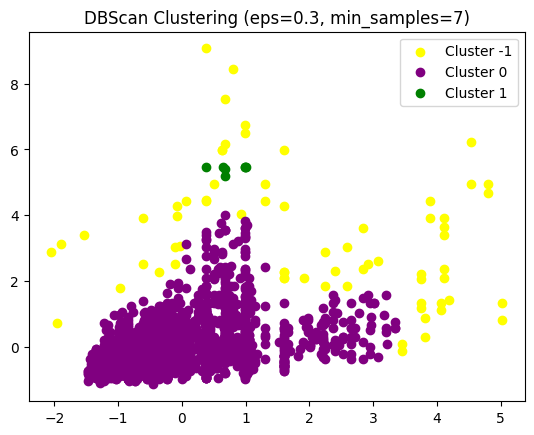

In [11]:
dbscan = DBSCAN(eps=0.34, min_samples=6)
y_dbscan = dbscan.fit_predict(x)
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
print(f'eps={eps}, min_samples={min_samples}, clusters={n_clusters_}')

unique_labels = np.unique(y_dbscan)
colors = ['yellow','purple','Green']
plt.figure()
for label,color in zip(unique_labels,colors):
    cluster_points = x[y_dbscan == label]
    plt.scatter(cluster_points['battery_capacity'], cluster_points['Price'],c=color ,label=f'Cluster {label}')

plt.title(f'DBScan Clustering (eps={eps}, min_samples={min_samples})')
plt.legend()
plt.show()

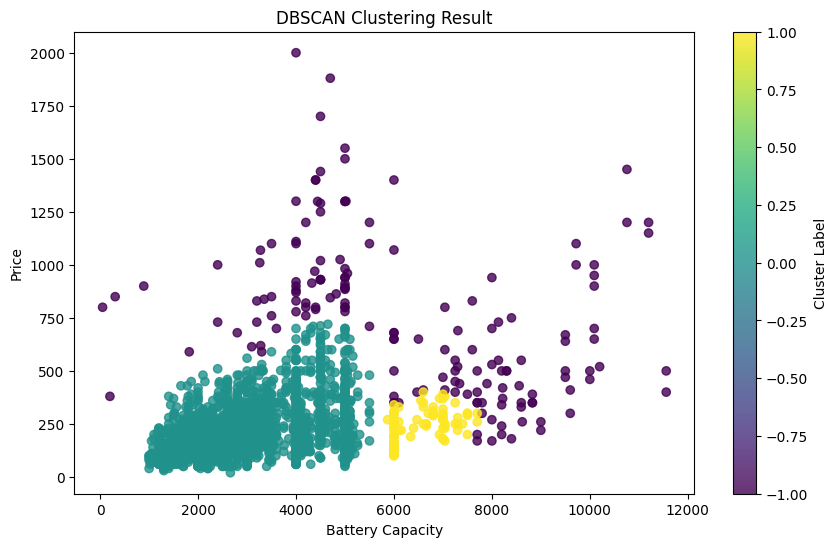

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import numpy as np


np.random.seed(0)
x = data[['battery_capacity','Price']].values

best_eps = 0.04
best_min_samples = 20

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
pipeline = make_pipeline(MinMaxScaler(), dbscan)
best_labels = pipeline.fit_predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=best_labels, cmap='viridis', alpha=0.8)
plt.title("DBSCAN Clustering Result")
plt.xlabel("Battery Capacity")
plt.ylabel("Price")
plt.colorbar(label="Cluster Label")
plt.show()